In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\Tele.csv")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [62]:
df.drop(columns=['customerID'])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int32
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   int64
 7   MultipleLines     7043 non-null   int32
 8   InternetService   7043 non-null   int32
 9   OnlineSecurity    7043 non-null   int32
 10  OnlineBackup      7043 non-null   int32
 11  DeviceProtection  7043 non-null   int32
 12  TechSupport       7043 non-null   int32
 13  StreamingTV       7043 non-null   int32
 14  StreamingMovies   7043 non-null   int32
 15  Contract          7043 non-null   int32
 16  PaperlessBilling  7043 non-null   int32
 17  PaymentMethod     7043 non-null  

In [64]:
df_corr=df.corr()


plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True)
plt.show()

**Splitting the data**

In [74]:
x=df.drop(columns=['customerID','Churn'])
y=df['Churn']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5806,0,0,0,1,2,1,0,2,1,1,1,1,1,1,0,1,2,21,3035
3678,1,0,1,1,16,1,2,0,2,2,0,2,2,2,0,0,2,993,726
4060,1,0,1,1,54,1,2,0,0,0,2,0,0,2,2,0,1,598,2950
1577,0,0,1,1,17,1,0,1,0,0,2,2,2,2,1,0,0,1254,1203
5007,1,0,0,0,25,1,0,2,1,1,1,1,1,1,0,0,3,41,4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,0,0,1,1,30,1,0,0,0,0,2,2,2,0,1,1,2,618,1592
2055,1,0,0,0,45,1,2,1,2,0,2,2,2,2,0,1,1,1440,4200
6381,1,0,0,1,1,1,0,2,1,1,1,1,1,1,0,0,3,20,1485
5099,0,0,0,1,11,1,0,2,1,1,1,1,1,1,0,0,1,31,1843


In [83]:
#Standarized
scaler=StandardScaler()
Standarized=scaler.fit_transform(df)
Standarized

array([[ 0.91189045, -1.00955867, -0.43991649, ..., -1.13176632,
        -0.39860759, -0.60102348],
       [ 0.21690598,  0.99053183, -0.43991649, ..., -0.38773977,
        -0.94876238, -0.60102348],
       [-0.47070074,  0.99053183, -0.43991649, ..., -0.51731743,
        -1.64188328,  1.66382851],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ..., -1.14221613,
        -0.13968008, -0.60102348],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  0.23297901,
        -0.31653445,  1.66382851],
       [-0.63694614,  0.99053183, -0.43991649, ...,  1.4723266 ,
         1.13801338, -0.60102348]])

In [87]:
model=LogisticRegression()
model.fit(x_train,y_train)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred=model.predict(x_test)

In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
y_pred1=model.predict(x)

In [92]:
df['Prediction']=y_pred1

In [93]:
df['Prediction']

0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Prediction, Length: 7043, dtype: int64

In [94]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,5375,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,1,2,-1.131766,-0.398608,0,0
1,3962,1,0,0,0,0.066327,1,0,0,2,...,0,0,0,1,0,3,-0.387740,-0.948762,0,0
2,2564,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,1,3,-0.517317,-1.641883,1,0
3,5535,1,0,0,0,0.514251,0,1,0,2,...,2,0,0,1,0,0,-0.872611,-0.983710,0,0
4,6511,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,1,2,0.095041,-1.235224,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,-0.340876,1,2,0,2,...,2,2,2,1,1,3,0.642612,-0.879397,0,0
7039,1525,0,0,1,1,1.613701,1,2,1,0,...,0,2,2,1,1,1,1.372008,1.292099,0,0
7040,3367,0,0,1,1,-0.870241,0,1,0,2,...,0,0,0,0,1,2,-1.142216,-0.139680,0,0
7041,5934,1,1,1,0,-1.155283,1,2,1,0,...,0,0,0,0,1,3,0.232979,-0.316534,1,1


In [96]:
cm = confusion_matrix(y_test, y_pred)

In [97]:
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[956 105]
 [171 177]]


In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8041163946061036


In [100]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall:.2f}")

Recall Score: 0.51


In [101]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1061
           1       0.63      0.51      0.56       348

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.80      1409



In [102]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.5619047619047619


<Axes: >

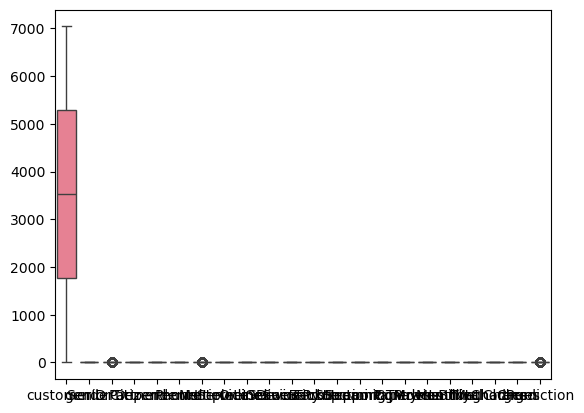

In [103]:
sns.boxplot(df)

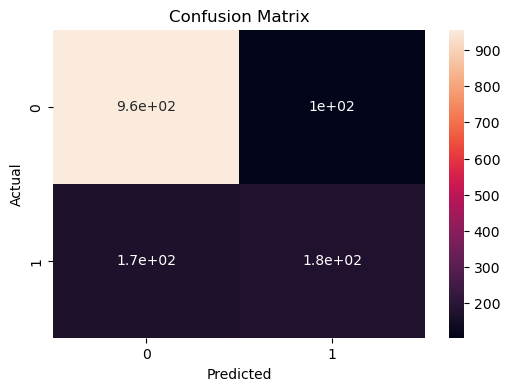

In [106]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
